# Example Using MNIST Data 

## Rank autoencoder nodes based on their ability to separate digits 0 and 1

After training an autoencoder using MNIST training set, we obtain the optimal weight and bias ($W^*$ and $b^*$). We use them to transform testing digits 0 and 1 into their latent representation (shown in the matrix $A$), i.e. their values in the hidden layer of the autoencoder. Their corresponding labels are in the vector $L$ where 0 represent digit 0 and 1 represent digit 1. Note that if other digits are tested, they will need to be re-labeled using 0 and 1 as well. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ans import ans

A = np.load('./Data/A_mnist_01.npy')
L = np.load('./Data/L_mnist_01.npy')

The autoencoder node saliency (ANS) ranks the nodes using supervised node saliency (ANS) and computes the normalized entropy difference values for both digits combined and single digits separately (i.e. NED, NED0 and NED1). We use the default number of bins, 10, in a histogram. To change the number of bins, we can specify ```numBins``` after the input parameter ```ans(A,L,numBins)```.

In [3]:
NED, NED0, NED1, sns_incr, sns_bi, g0Count, g1Count = ans(A,L)

The description of the output from the function ```ans()``` is:<br>
- ```NED```: normalized entropy difference considering both classes for each nodes;<br>
- ```NED0```: normalized entropy difference for class 0 for each nodes;<br>
- ```NED1```: normalized entropy differnce for class 1 for each nodes;<br>
- ```sns_incr```: supervised node saliency using increasing probability distribution that ranks the hidden nodes;<br>
- ```sns_bi```: supervised node saliency using binary distribution that ranks the hidden nodes;<br>
- ```g0Count```: number of class 0 in each bin for each nodes; <br>
- ```g1Count```: number of class 1 in each bin for each nodes.

## Sort SNS values

We sort the hidden nodes according to their SNS values. Here we use the SNS with the binary distribution as an example. ```CE_idx``` contains the sorted node indices. The node number should be a node's index value plus one.   

In [4]:
CE_idx = sns_bi.argsort()
sortedCE = sns_bi[sns_bi.argsort()]

### Stacked histogram of the best node

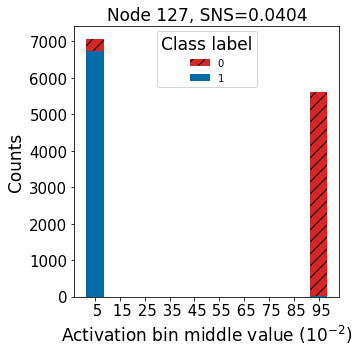

In [5]:
myblue = '#%02x%02x%02x' % (0,107,164)
myred = '#%02x%02x%02x' % (214,39,40)

width = 0.7 # width of the bars
numBins = 10
label1 = 1
label0 = 0
lNames = ['0','1']

#------------------------------
# Histogram of the best node
#------------------------------
targetNode = CE_idx[0]
ind = np.arange(numBins)

fig = plt.figure(figsize=(5,5))
p1 = plt.bar(ind,g1Count[targetNode,],width,color=myred,bottom=g0Count[targetNode,],hatch='//')
p2 = plt.bar(ind,g0Count[targetNode,],width,color=myblue)

plt.ylabel('Counts',fontsize=17)
plt.xlabel('Activation bin middle value ($10^{-2}$)',fontsize=17)
plt.title('Node '+str(targetNode+1)+', SNS=%.4f' %(sns_bi[targetNode]),fontsize=17)
plt.xticks(ind,(' 5',' 15',' 25',' 35',' 45',' 55',' 65',' 75',' 85',' 95'))
plt.tick_params(labelsize=15)
plt.tight_layout()

lg = plt.legend((p1[0],p2[0]),(lNames[0],lNames[1]),loc='upper center',title='Class label')
plt.setp(lg.get_title(),fontsize=17)

plt.show()

### SNS curve

The hidden nodes are sorted according to their SNS values. The sorted SNS values are shown in the curve. The original node numbera appear every finve nodes. The top ranked node is node 127 as shown on the graph. 

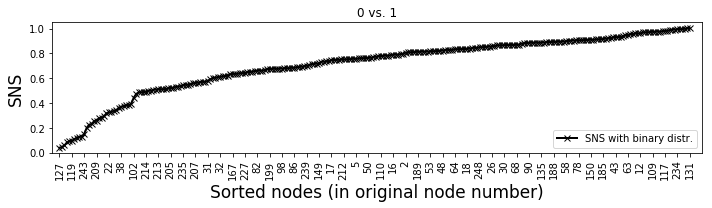

In [6]:
fig = plt.figure(figsize=(10,3))

snsx = np.arange(len(sns_bi))
plt.plot(snsx,sortedCE,'kx-', linewidth=2, label='SNS with binary distr.')

plt.legend(loc='lower right')

xlocation = np.arange(0,len(sns_bi),5)
xlabels = CE_idx[xlocation] + 1
plt.xticks(xlocation, xlabels, rotation='vertical')

plt.ylabel('SNS',fontsize=17)
plt.xlabel('Sorted nodes (in original node number)',fontsize=17)
plt.title('0 vs. 1')
plt.xlim([-3,260])
plt.ylim([0,1.05])
plt.tight_layout()
plt.show()

### NED curves

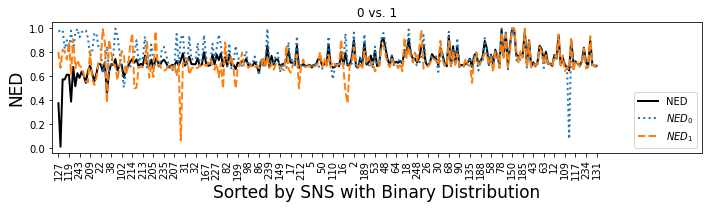

In [7]:
fig = plt.figure(figsize=(10,3))

nedRed = '#%02x%02x%02x' % (214,39,40)
nedx = np.arange(len(NED))
plt.plot(nedx,NED[CE_idx],'k', linewidth=2, label='NED')
plt.plot(nedx,NED0[CE_idx],':',mfc=myblue, linewidth=2,label='$NED_0$')
plt.plot(nedx,NED1[CE_idx],'--',mfc=nedRed,linewidth=2, label='$NED_1$')

plt.legend(loc='lower right')

xlocation = np.arange(0,len(sns_bi),5)
xlabels = CE_idx[xlocation] + 1
plt.xticks(xlocation, xlabels, rotation='vertical')

plt.ylabel('NED',fontsize=17)
plt.xlabel('Sorted by SNS with Binary Distribution',fontsize=17)
plt.title('0 vs. 1')
plt.xlim([-3,305])
plt.tight_layout()
plt.show()

The property for a valid classifying node states that a classifying node should satisfy the condition where:

$$ NED < NED_0 \quad \text{and} \quad NED < NED_1 $$.

The NED curves indicate that the top five nodes sorted by SNS with binary distribution satisfy the property for a valid classifying node.

## Weight on pixels from the best classifying node 

The best classifying node (node 127) gives weight values on pixels. 

<Figure size 432x288 with 0 Axes>

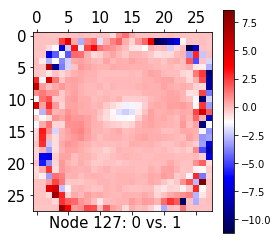

In [9]:
nodeIdx = 126
W = np.load('./Data/W_mnist.npy')
Weight = W[:,nodeIdx]

pixels = Weight.reshape((28, 28))

fig = plt.gcf()
plt.matshow(pixels,cmap='seismic')
plt.colorbar()
plt.tick_params(labelsize=15)
plt.text(2,30,'Node 127: 0 vs. 1', fontsize=15)
plt.show()

Beside the high absolute weights on the boarder, there exists a region in the middle helps distinguish strokes of digit 0 from digit 1. Note that weights on the region do not necessarity have high absolute values.s